In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [94]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3132 non-null   int64  
 1   ontology       3132 non-null   object 
 2   failed         3132 non-null   bool   
 3   failed_repair  3132 non-null   bool   
 4   steps          2200 non-null   float64
 5   time           2200 non-null   float64
 6   calls          2200 non-null   float64
 7   iic_mcs        2199 non-null   float64
 8   iic_remove     2188 non-null   float64
 9   inf_mcs        2199 non-null   float64
 10  inf_weakening  2199 non-null   float64
 11  inf_remove     2188 non-null   float64
dtypes: bool(2), float64(8), int64(1), object(1)
memory usage: 250.9+ KB


,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove
count,3132.000000,2200.000000,2200.000000,2200.000000,2199.000000,2188.000000,2199.000000,2199.000000,2188.000000
mean,1565.500000,2.505909,6691.431818,6875.086818,0.519567,0.592829,2736.469304,2776.176899,2704.082724
std,904.274848,6.336477,22412.799799,8437.433987,0.366800,0.332428,3175.967175,3290.150268,3221.795026
min,0.000000,1.000000,605.000000,548.000000,0.000000,0.000000,120.000000,118.000000,120.000000
25%,782.750000,1.000000,1425.750000,2147.500000,0.134314,0.500000,457.000000,421.500000,395.750000
50%,1565.500000,1.000000,2116.000000,3987.000000,0.500000,0.500000,875.000000,876.000000,875.000000
75%,2348.250000,2.000000,3795.250000,8315.250000,0.903711,0.998972,5322.000000,5509.500000,5259.250000
max,3131.000000,143.000000,282936.000000,112949.000000,1.000000,1.000000,13386.000000,13822.000000,13591.000000


In [95]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred class hierarchy size (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred class hierarchy size (mcs)'] = repair_data['inf_mcs']
repair_data['Inferred class hierarchy size (removal)'] = repair_data['inf_remove']

In [96]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37791 non-null  int64  
 1   ontology    37791 non-null  object 
 2   reasoner    37791 non-null  object 
 3   size        37791 non-null  int64  
 4   type        37791 non-null  object 
 5   time        37791 non-null  float64
 6   calls       37791 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


,Unnamed: 0,size,time,calls
count,37791.000000,37791.000000,37791.000000,37791.000000
mean,18895.000000,16.332460,309.677654,7199.666524
std,10909.466348,23.338733,694.406608,11597.458895
min,0.000000,1.000000,0.000000,0.000000
25%,9447.500000,5.000000,29.050000,885.700000
50%,18895.000000,10.000000,81.400000,2324.800000
75%,28342.500000,20.000000,271.400000,7169.005000
max,37790.000000,100.000000,12190.000000,84194.000000


In [97]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map(
    {'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map(
    {'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

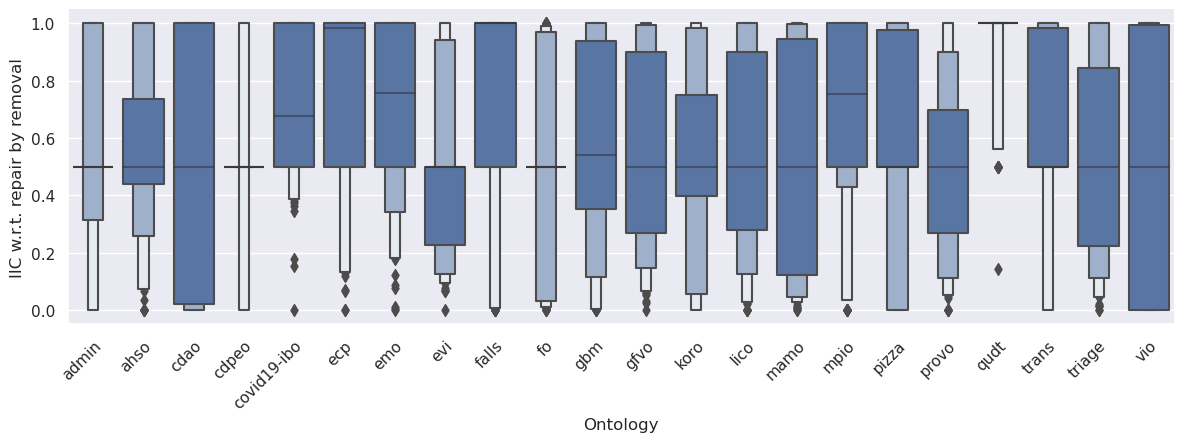

In [98]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-remove-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.5327560975609756, (0.47878787878787876, 0.5867560975609756)), 'ahso': (0.555313173161211, (0.499597609798639, 0.6109897578380205)), 'cdao': (0.5276460631479941, (0.4475936981341434, 0.606204797865017)), 'cdpeo': (0.49845588235294114, (0.4547058823529412, 0.5428676470588235)), 'covid19-ibo': (0.6992939742018628, (0.65283207959711, 0.745475349154113)), 'ecp': (0.7419447085053658, (0.6791416646440896, 0.8024855918578302)), 'emo': (0.6910451800229203, (0.6325338196383788, 0.7478411508842291)), 'evi': (0.4936041530203961, (0.4386800057299403, 0.5486565764883372)), 'falls': (0.779777217483711, (0.7167190391509378, 0.8394810350068058)), 'fo': (0.5039133557684486, (0.44408472977177743, 0.5636824466828569)), 'gbm': (0.594126437963229, (0.5276556291992285, 0.6599710625763731)), 'gfvo': (0.5560784965905674, (0.4942630944222322, 0.6179116315113599)), 'koro': (0.5124629322694616, (0.4530962335234818, 0.5722791184106373)), 'lico': (0.548266729918797, (0.48409551910232296, 0.612244097543

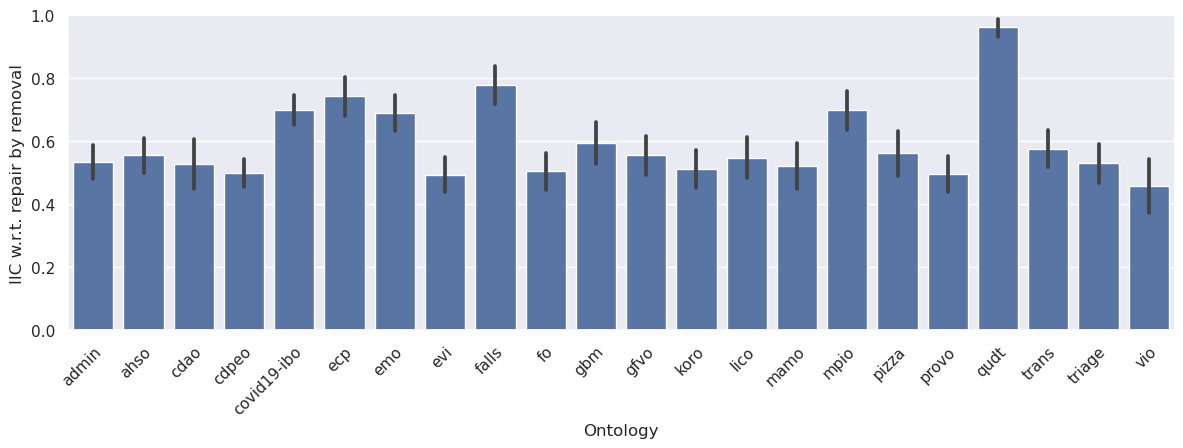

In [99]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-remove-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print({order[i]: (repair_data[repair_data['Ontology'] == order[i]]
      ['iic_remove'].mean(), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (0.3866805656928564, (0.31295869407455784, 0.46262133571785696)), 'ahso': (0.5062382021302634, (0.44664214747591413, 0.5665436688893517)), 'cdao': (0.5258845591551965, (0.44912734991353337, 0.6026367053992215)), 'cdpeo': (0.21879702973514134, (0.16573220231506713, 0.2755329534219064)), 'covid19-ibo': (0.6294735352556385, (0.5782252854628297, 0.6798155192423804)), 'ecp': (0.3616732057104788, (0.28776414288655955, 0.43898292784074494)), 'emo': (0.6025854906855139, (0.5418991908621088, 0.662329322423891)), 'evi': (0.5918757818345141, (0.5317534505565786, 0.6513950260765787)), 'falls': (0.4935357468403362, (0.41709856994962347, 0.5704025052749557)), 'fo': (0.6954964295649319, (0.627080730625095, 0.7602416732379411)), 'gbm': (0.5158517649021739, (0.4495165758013686, 0.5830107429970793)), 'gfvo': (0.5429974724028777, (0.48594384627899595, 0.599912662492367)), 'koro': (0.36536678446084053, (0.2949365814143758, 0.43702616038707404)), 'lico': (0.5320824537885087, (0.46661173489002516,

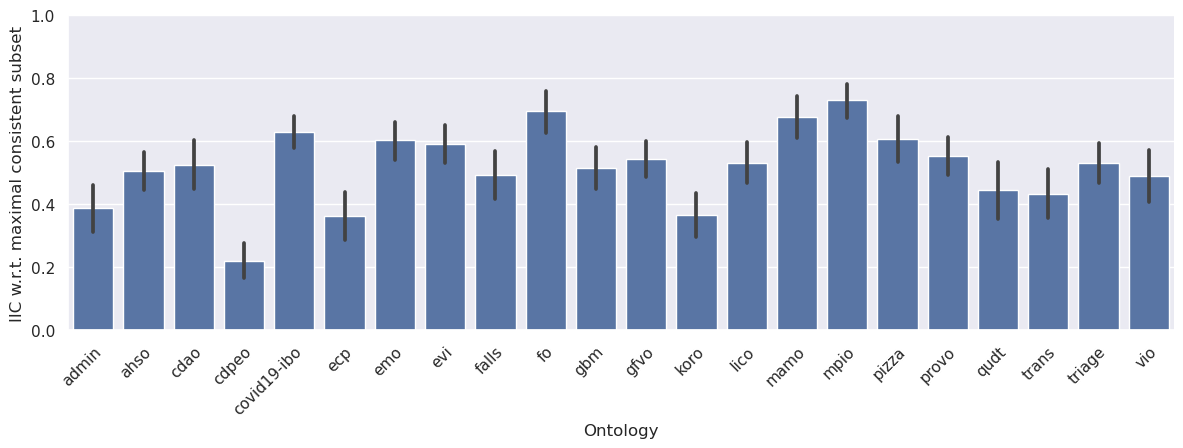

In [100]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print({order[i]: (repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs'].mean(), ci) for i, ci in enumerate(zip(lower, upper))})

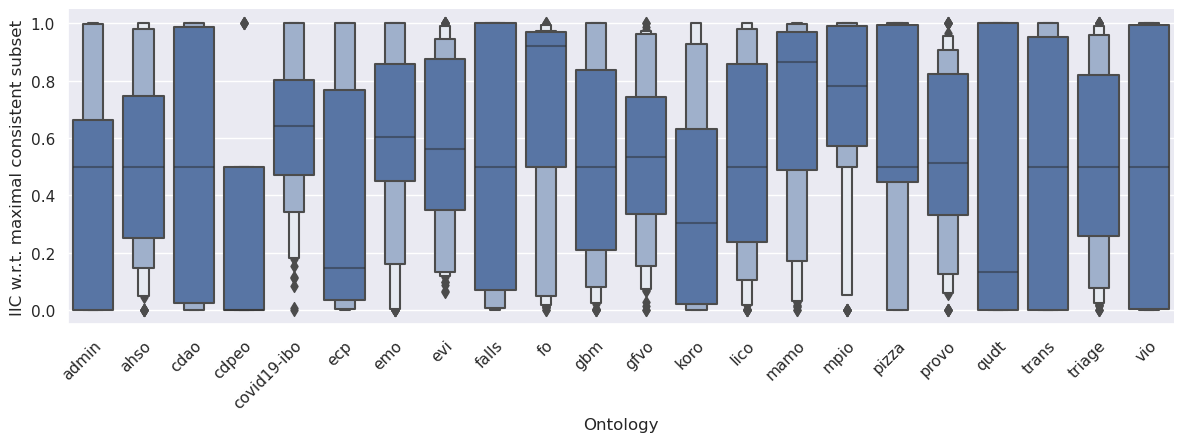

In [101]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-mcs-ontology-violin.png', dpi=100, bbox_inches = "tight")

0.5928291020033971 ((0.5789711821381062, 0.6067271893002271),)
0.5195672214500293 ((0.5042115218287945, 0.5348646521380084),)


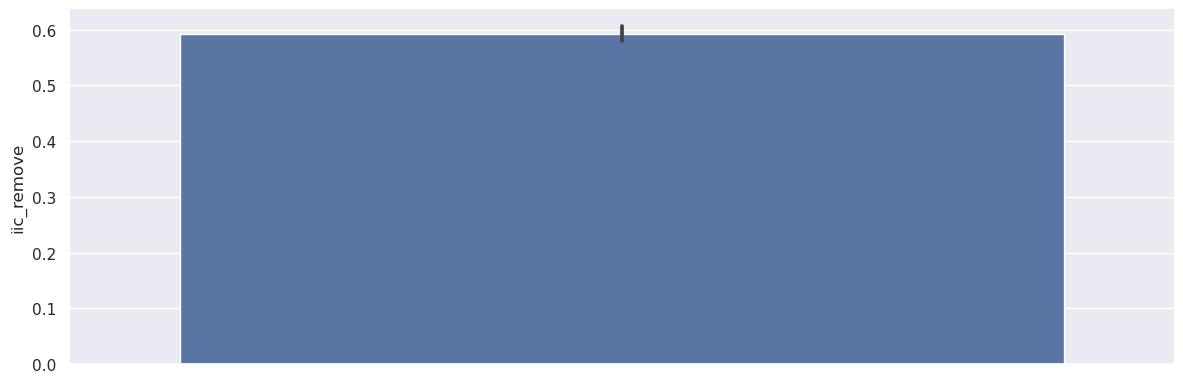

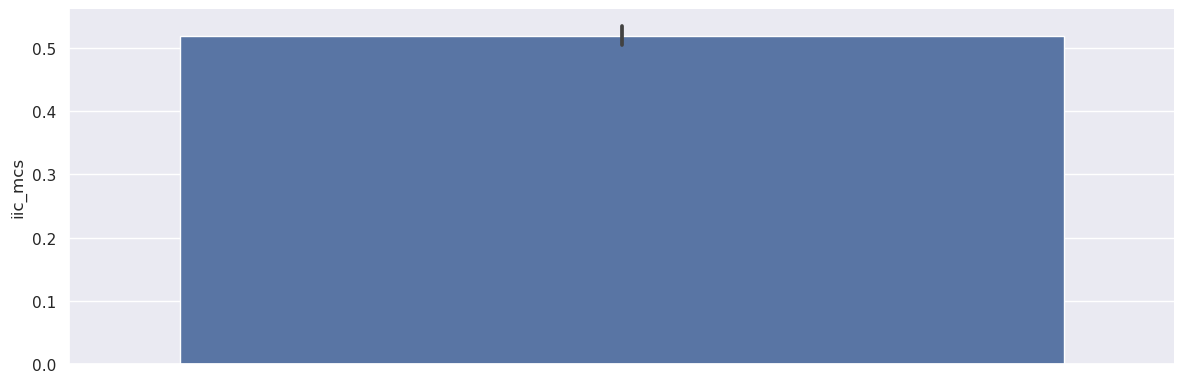

In [102]:
facet = sns.catplot(data=repair_data, kind='bar', y='iic_remove', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print(repair_data['iic_remove'].mean(), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_mcs', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print(repair_data['iic_mcs'].mean(), tuple(zip(lower, upper)))

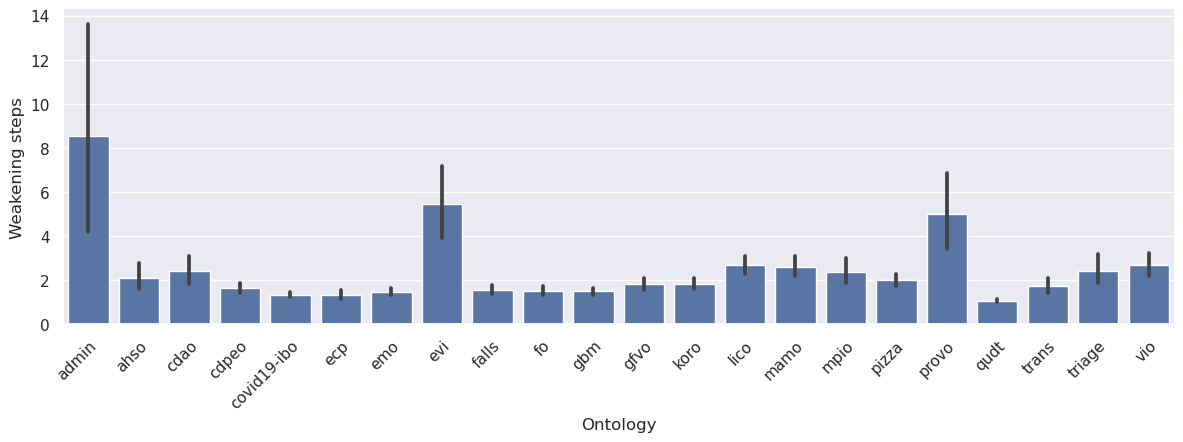

In [103]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Weakening steps', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print({order[i]: (repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs'].mean(), ci) for i, ci in enumerate(zip(lower, upper))})

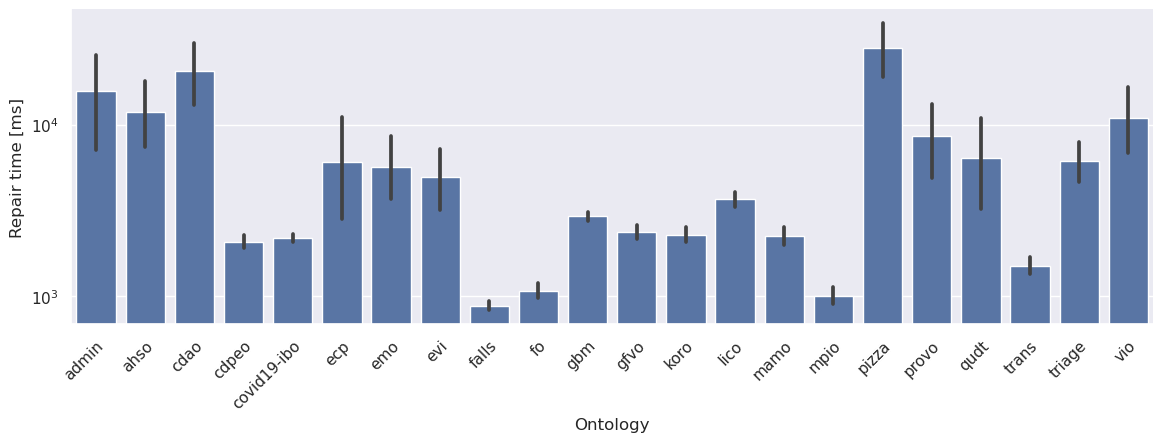

In [104]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Repair time [ms]', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print({order[i]: (repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs'].mean(), ci) for i, ci in enumerate(zip(lower, upper))})

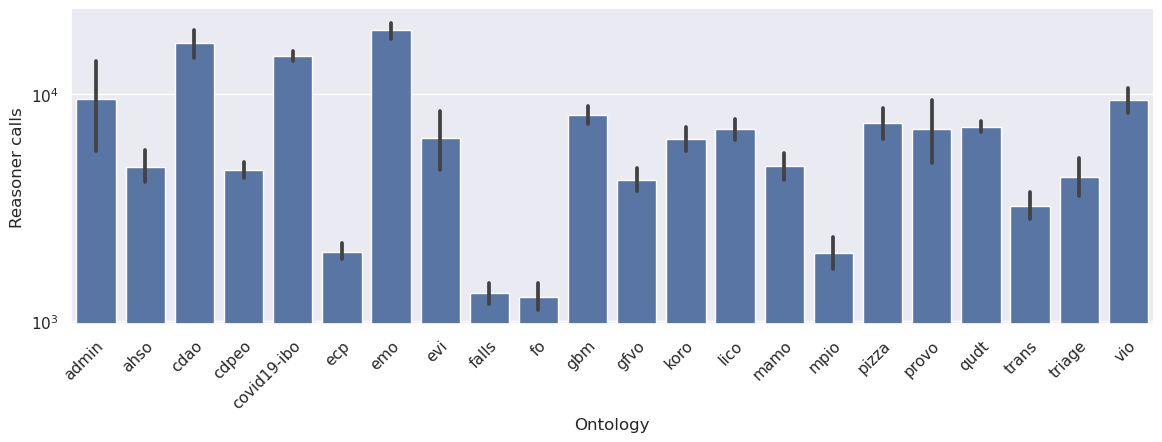

In [105]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Reasoner calls', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print({order[i]: (repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs'].mean(), ci) for i, ci in enumerate(zip(lower, upper))})

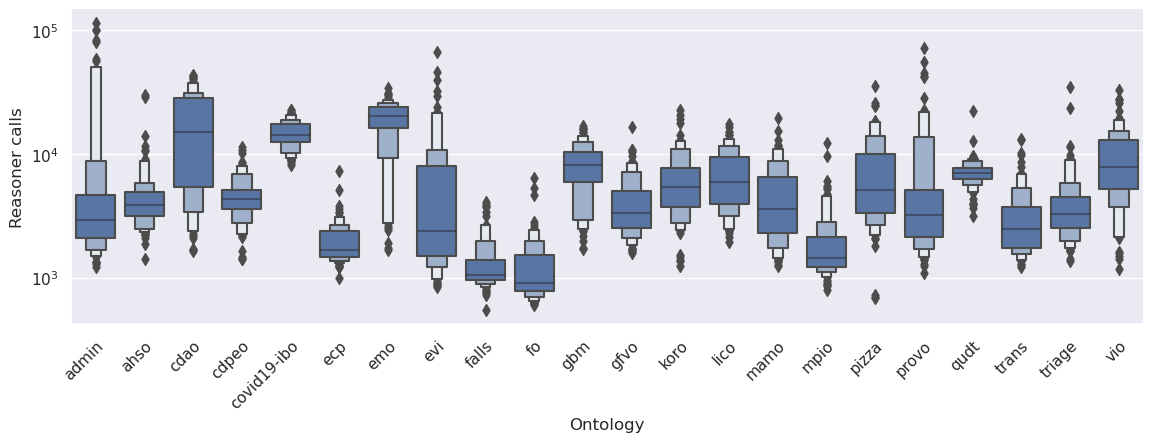

In [106]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Reasoner calls', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-ontology-violin.png', dpi=100, bbox_inches = "tight")

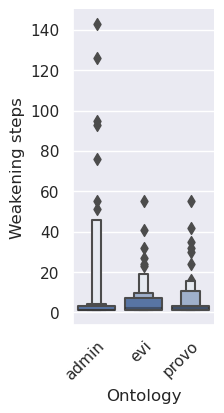

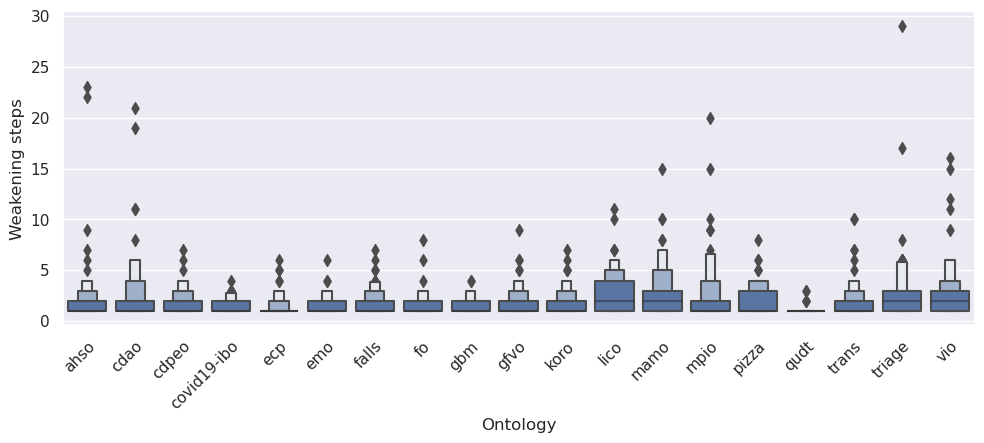

In [107]:
order = ['admin', 'evi', 'provo']
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps', height=4, aspect=0.6, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-violin-1.png', dpi=100, bbox_inches = "tight")

order = sorted(set(np.unique(repair_data['Ontology'])) - {'admin', 'evi', 'provo'})
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps', height=4, aspect=2.5, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-violin-2.png', dpi=100, bbox_inches = "tight")

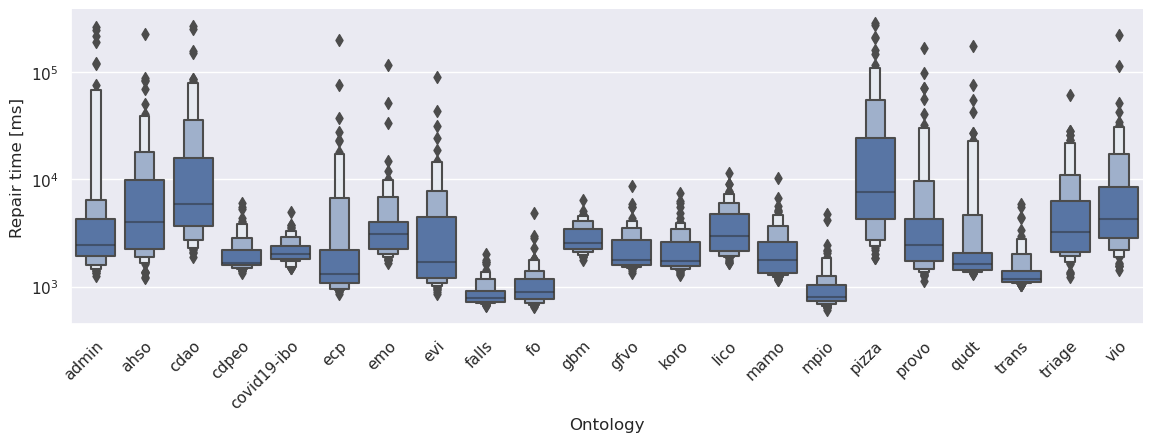

In [121]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Repair time [ms]', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-violin.png', dpi=100, bbox_inches = "tight")

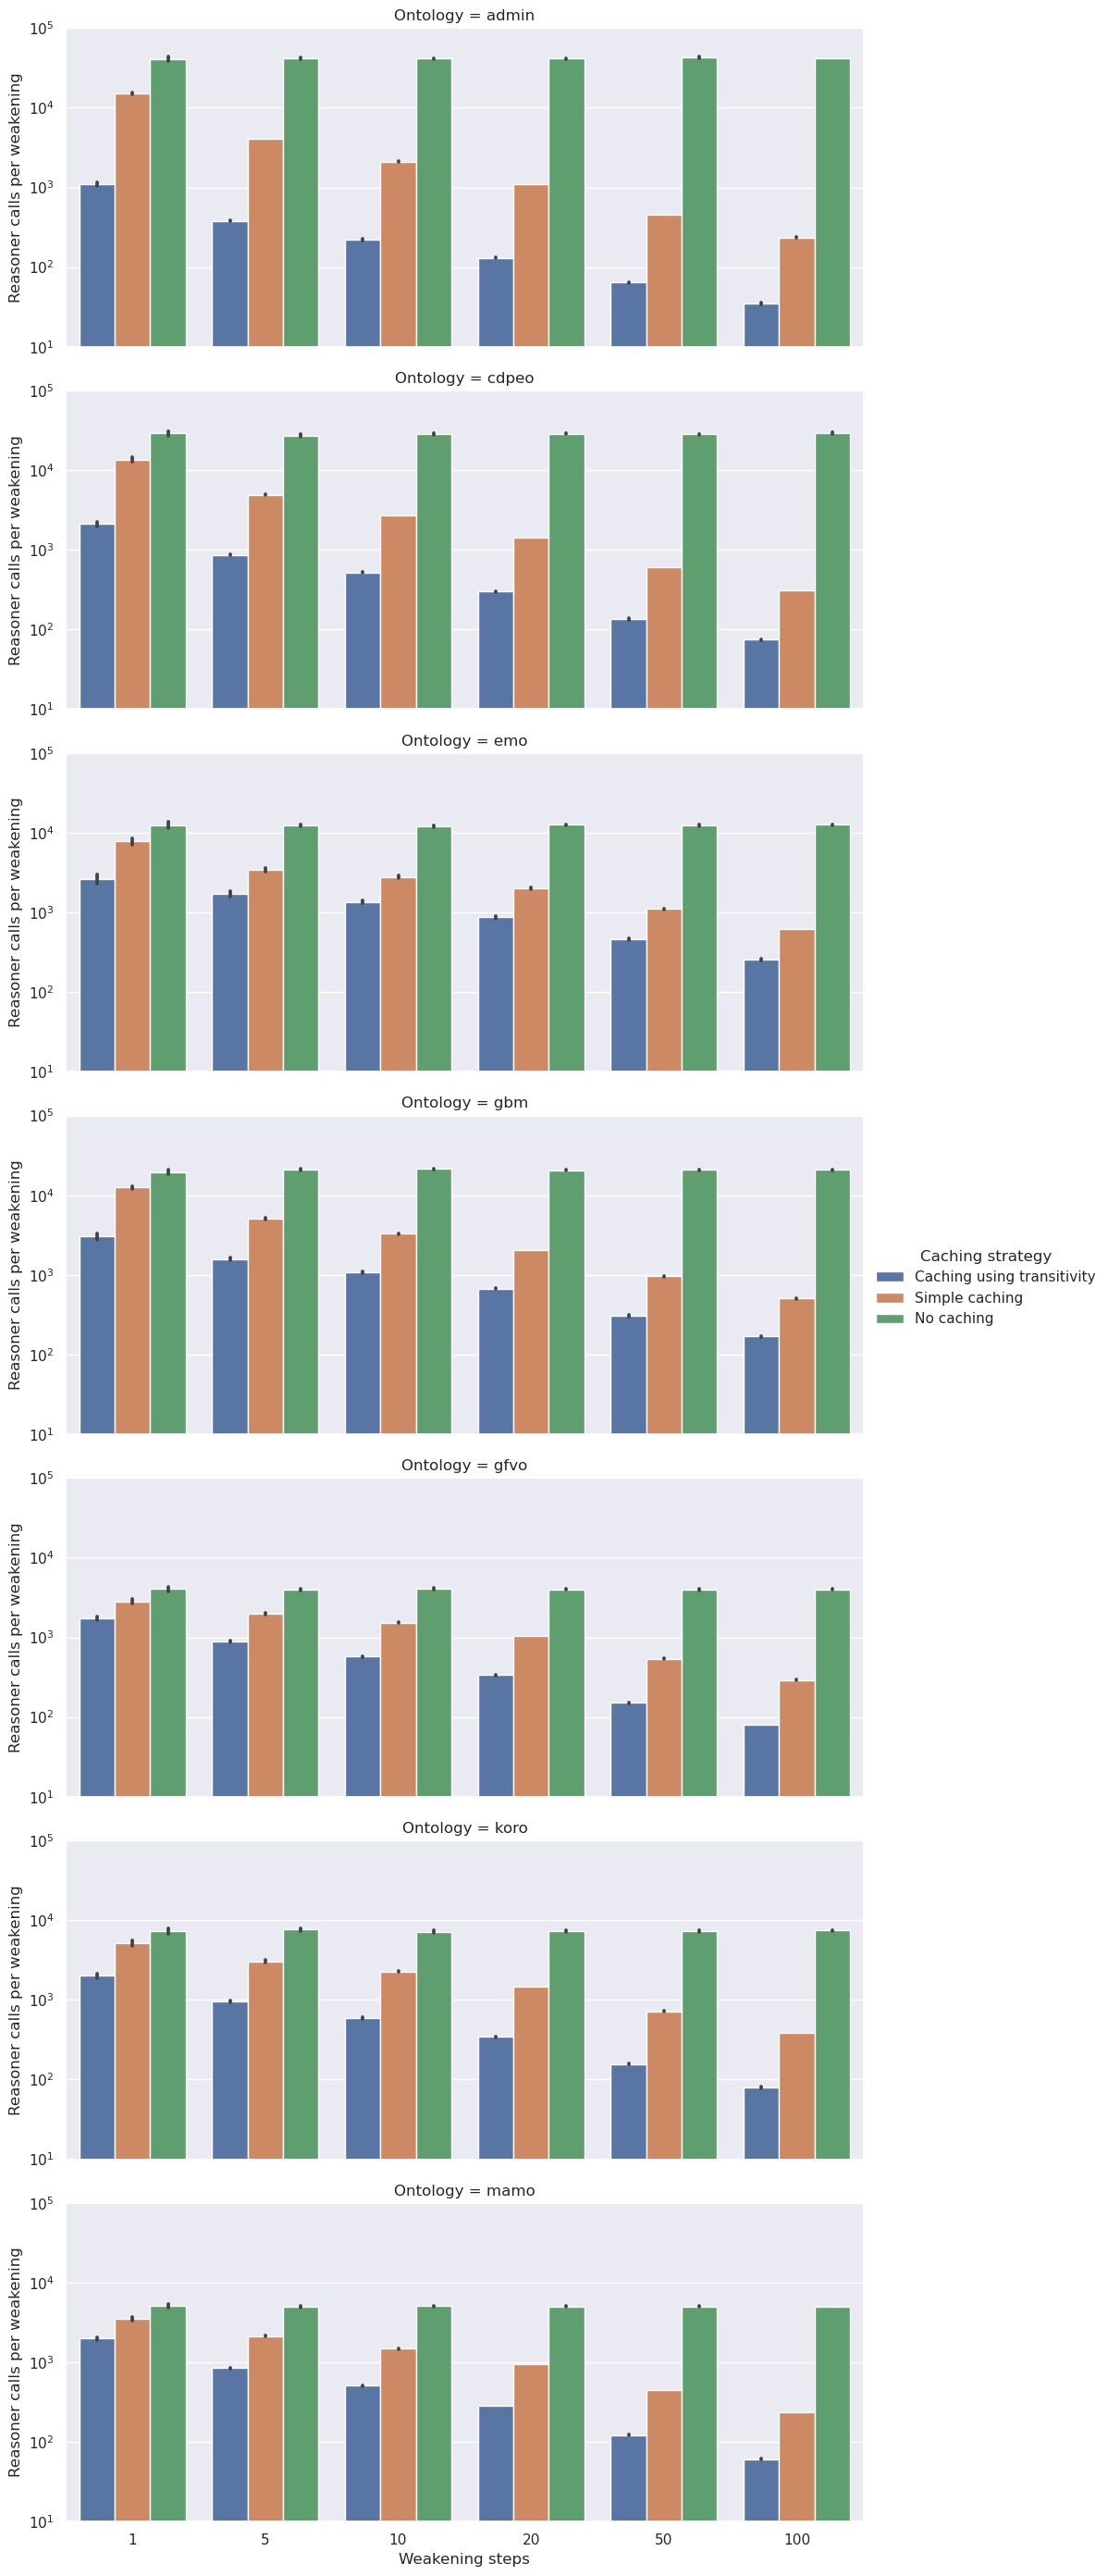

In [109]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
g = sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
                hue='Caching strategy', row='Ontology', height=4, aspect=2.5, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-ontology-bar.png', dpi=100, bbox_inches = "tight")

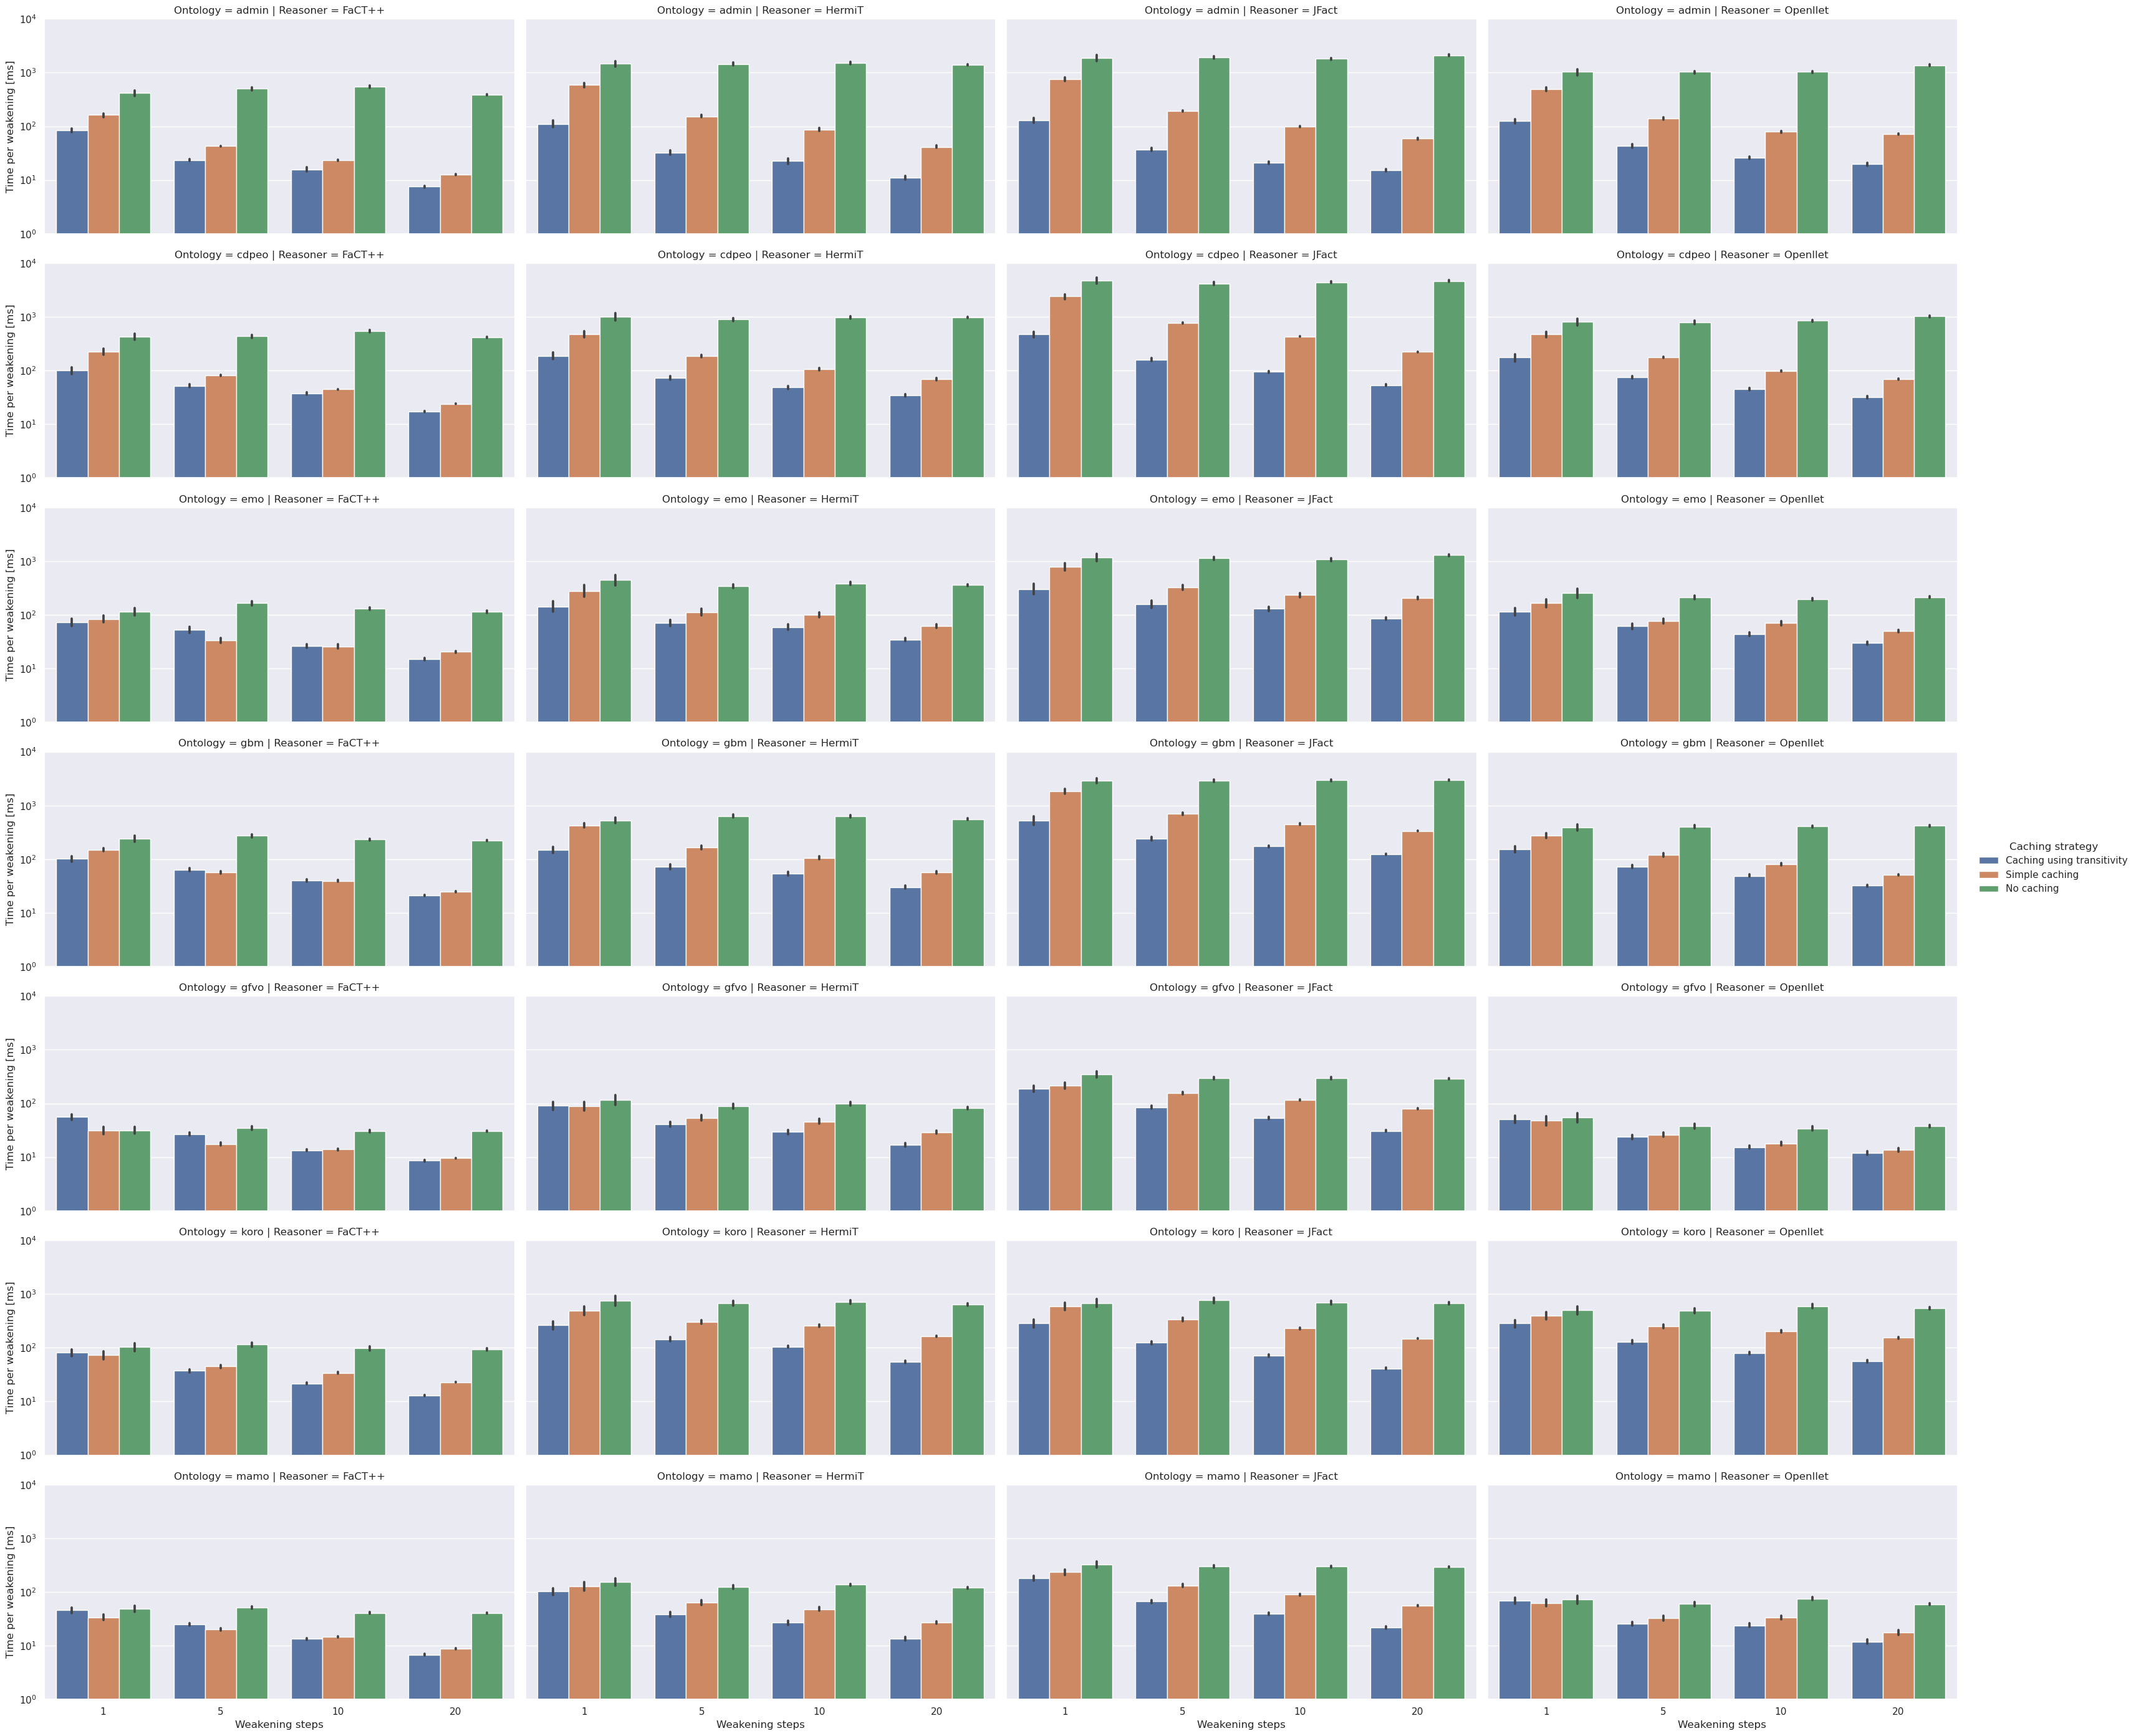

In [110]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data[cache_data['size'] <= 20], kind='bar', x='Weakening steps', y='Time per weakening [ms]',
            hue='Caching strategy', row='Ontology', col='Reasoner', height=4, aspect=2, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-ontology-reasoner-bar.png', dpi=100, bbox_inches = "tight")

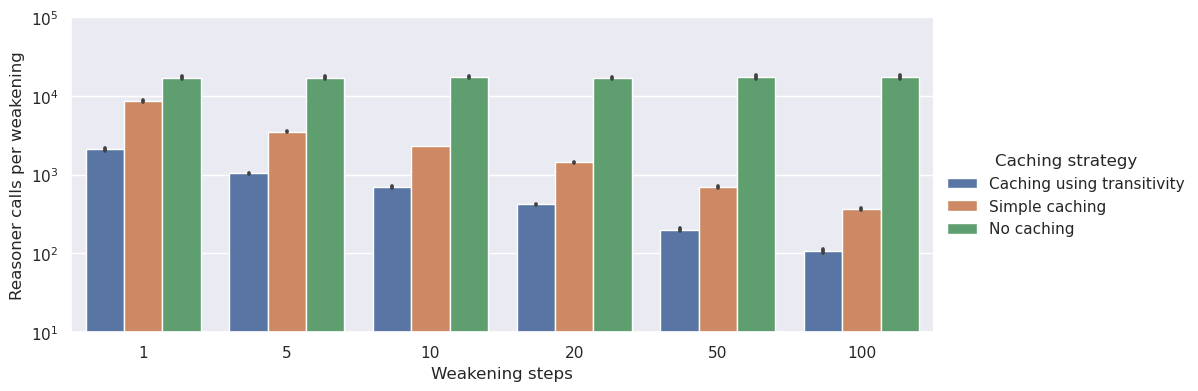

In [111]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
            hue='Caching strategy', height=4, aspect=2.5, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-bar.png', dpi=100, bbox_inches = "tight")

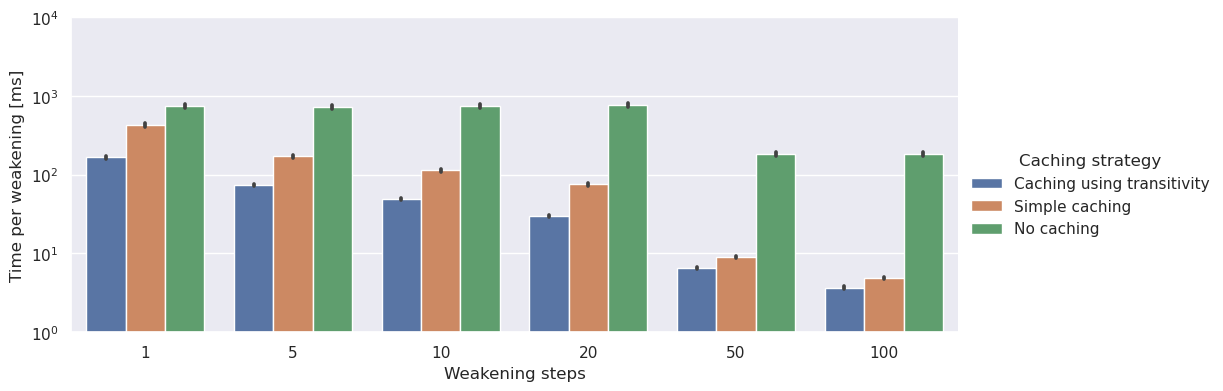

In [112]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps',
            y='Time per weakening [ms]', hue='Caching strategy', height=4, aspect=2.5, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-bar.png', dpi=100, bbox_inches = "tight")

In [113]:
type = ['Caching using transitivity', 'Simple caching', 'No caching']
onto = np.unique(cache_data['Ontology'])
size = np.unique(cache_data['Weakening steps'])
reas = np.unique(cache_data['Reasoner'])
print({o: {t: {s: round(cache_data[(cache_data['Ontology'] == o) & (cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s)]['Reasoner calls per weakening'].mean()) for s in size} for t in type} for o in onto})

print({r: {o: {t: {s: round(cache_data[(cache_data['Ontology'] == o) & (cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s) & (cache_data['Reasoner'] == r)]['Time per weakening [ms]'].mean(), 1) for s in size} for t in type} for o in onto} for r in reas})

{'admin': {'Caching using transitivity': {1: 1096, 5: 381, 10: 222, 20: 131, 50: 64, 100: 35}, 'Simple caching': {1: 15138, 5: 4072, 10: 2115, 20: 1092, 50: 459, 100: 236}, 'No caching': {1: 41105, 5: 42224, 10: 41288, 20: 41377, 50: 42663, 100: 41751}}, 'cdpeo': {'Caching using transitivity': {1: 2110, 5: 869, 10: 522, 20: 301, 50: 136, 100: 75}, 'Simple caching': {1: 13621, 5: 4936, 10: 2694, 20: 1436, 50: 608, 100: 312}, 'No caching': {1: 29051, 5: 27289, 10: 28617, 20: 28819, 50: 28244, 100: 29315}}, 'emo': {'Caching using transitivity': {1: 2652, 5: 1720, 10: 1355, 20: 864, 50: 463, 100: 258}, 'Simple caching': {1: 7781, 5: 3436, 10: 2784, 20: 2023, 50: 1103, 100: 619}, 'No caching': {1: 12524, 5: 12357, 10: 12134, 20: 12548, 50: 12462, 100: 12552}}, 'gbm': {'Caching using transitivity': {1: 3019, 5: 1577, 10: 1074, 20: 674, 50: 309, 100: 168}, 'Simple caching': {1: 12572, 5: 5065, 10: 3284, 20: 2057, 50: 956, 100: 503}, 'No caching': {1: 19490, 5: 20945, 10: 21330, 20: 20581, 50:

In [114]:
print({t: {s: round(cache_data[(cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s)]['Reasoner calls per weakening'].mean()) for s in size} for t in type})

print({r: {t: {s: round(cache_data[(cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s) & (cache_data['Reasoner'] == r)]['Time per weakening [ms]'].mean(), 1) for s in size if s <= 20 or r == 'FaCT++'} for t in type} for r in reas})

{'Caching using transitivity': {1: 2086, 5: 1033, 10: 693, 20: 419, 50: 200, 100: 108}, 'Simple caching': {1: 8664, 5: 3524, 10: 2309, 20: 1437, 50: 691, 100: 368}, 'No caching': {1: 16937, 5: 17059, 10: 17102, 20: 17007, 50: 17194, 100: 17263}}
{'FaCT++': {'Caching using transitivity': {1: 77.1, 5: 40.0, 10: 24.0, 20: 12.7, 50: 6.5, 100: 3.7}, 'Simple caching': {1: 108.8, 5: 42.4, 10: 28.0, 20: 17.6, 50: 8.9, 100: 4.9}, 'No caching': {1: 197.7, 5: 225.5, 10: 230.9, 20: 186.1, 50: 183.0, 100: 181.4}}, 'HermiT': {'Caching using transitivity': {1: 149.6, 5: 67.5, 10: 49.1, 20: 27.8}, 'Simple caching': {1: 354.1, 5: 148.0, 10: 106.9, 20: 63.8}, 'No caching': {1: 639.6, 5: 600.8, 10: 636.4, 20: 587.9}}, 'JFact': {'Caching using transitivity': {1: 297.1, 5: 124.1, 10: 83.1, 20: 52.8}, 'Simple caching': {1: 974.1, 5: 374.1, 10: 234.9, 20: 157.8}, 'No caching': {1: 1718.6, 5: 1641.5, 10: 1651.5, 20: 1757.7}}, 'Openllet': {'Caching using transitivity': {1: 138.3, 5: 61.2, 10: 40.3, 20: 27.4}, 

In [122]:
onto = np.unique(repair_data['Ontology'])
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
print({o: (
    round(repair_data[repair_data['Ontology'] == o]['Weakening steps'].mean(), 1),
    round(repair_data[repair_data['Ontology'] == o]['Reasoner calls'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['Repair time [ms]'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['failed'].mean(), 2),
    round(repair_data[repair_data['Ontology'] == o]['failed_repair'].mean(), 2),
) for o in onto})


{'admin': (8.5, 9462, 15649, 0.01, 0.01), 'ahso': (2.1, 4783, 11922, 0.28, 0.1), 'cdao': (2.4, 16734, 20674, 0.47, 0.12), 'cdpeo': (1.6, 4633, 2068, 0.0, 0.0), 'covid19-ibo': (1.3, 14632, 2186, 0.12, 0.04), 'ecp': (1.3, 2027, 6034, 0.12, 0.0), 'emo': (1.5, 19013, 5624, 0.02, 0.0), 'evi': (5.5, 6405, 4916, 0.68, 0.1), 'falls': (1.6, 1328, 876, 0.07, 0.02), 'fo': (1.5, 1282, 1064, 0.62, 0.25), 'gbm': (1.5, 8092, 2911, 0.0, 0.0), 'gfvo': (1.8, 4199, 2352, 0.0, 0.0), 'koro': (1.8, 6340, 2277, 0.0, 0.0), 'lico': (2.7, 7013, 3661, 0.2, 0.01), 'mamo': (2.6, 4799, 2243, 0.0, 0.0), 'mpio': (2.4, 1987, 999, 0.3, 0.08), 'pizza': (2.0, 7453, 28225, 0.57, 0.19), 'provo': (5.0, 7000, 8587, 0.1, 0.05), 'qudt': (1.1, 7150, 6389, 0.41, 0.08), 'trans': (1.7, 3218, 1494, 0.06, 0.0), 'triage': (2.4, 4295, 6107, 0.49, 0.17), 'vio': (2.7, 9406, 10955, 0.07, 0.04)}
